# นายศุภวิชญ์ ศุภเสถียร 62070274

In [ ]:
import pandas as pd
import numpy as np
import requests
import scipy as sp
from bs4 import BeautifulSoup

# Part 1: Data Collection

In [186]:
url = requests.get('http://www.it.kmitl.ac.th/~teerapong/news_archive/index.html')#root URL
url_text = BeautifulSoup(url.content,'html')

In [187]:
list_path, list_month = [], [] #สร้าง list เปล่าเพื่อนำมาเก็บข้อมูลของ URL 

#ดึงข้อมูล path url และเดือนมาเก็บไว้ในลิสต์ที่สร้าง
for i in url_text.find_all('a',href = True):
  if i['href'] != '#':#ไม่เอาลิ้งที่มีสัญลักษณ์ # 
    list_path.append('http://www.it.kmitl.ac.th/~teerapong/news_archive/' + i['href'])
    list_month.append(i.text)

In [188]:
list_category, list_month_news, list_urlnews, list_path_content = [], [], [], []

#ดึงข้อมูล ประเภทของข่าว, เดือนที่ข่าวออกม, url ของข่าว 
for i in list_path:
  url_month = requests.get(i)
  url_mtext = BeautifulSoup(url_month.content,'html')
  url_mtextbody = url_mtext.tbody.find_all('a',href = True) #เอาเฉพาะใน tags <tbody>
  for j in url_mtext.find_all('td', {'class':'category'}):
    if j.text.strip() != 'N/A':#ไม่เอาค่าว่าง
        list_category.append(j.text.strip())
        list_month_news.append(list_month[list_path.index(i)])
  for k in url_mtextbody:
    list_urlnews.append('http://www.it.kmitl.ac.th/~teerapong/news_archive/' + k['href'])
    list_path_content.append(k['href'].split('.')[0])   

In [189]:
list_content ,list_header = [],[]
#ดึงข้อมูล เนื่้อหาข่าวและหัวข้อของข่าว
for i in list_urlnews:
    url_news = requests.get(i)
    content_txt = BeautifulSoup(url_news.content,'html')
    content_txt.find('p',{'class':'notice'}).decompose()#ลบ class notice ออก
    list_header.append(content_txt.h2.text)
    test_list = []
    for j in content_txt.find_all('p'):
     test_list.append(j.text)
    list_content.append(''.join(test_list))

In [190]:
#สร้าง dataframe เพื่อนำมา clean data
df = pd.DataFrame({ 'Header':list_header,'Content':list_content,'Category':list_category})

In [191]:
#check ตัวซ้ำ
df['Header'].value_counts()
df['Content'].value_counts()
df.duplicated().sum()

23

In [192]:
#drop ตัวซ้้าทิ้ง
df = df.drop_duplicates(subset=['Header'])
df = df.drop_duplicates(subset=['Content'])
#rest index
df = df.reset_index(drop=True)

In [193]:
#check ตัวซ้ำ
df.duplicated().sum()

0

In [194]:
df.head(5)

,Header,Content,Category
0,21st-Century Sports: How Digital Technology Is...,The sporting industry has come a long way sinc...,technology
1,Asian quake hits European shares,Asian quake hits European sharesShares in Euro...,business
2,BT offers free net phone calls,BT is offering customers free internet telepho...,technology
3,Barclays shares up on merger talk,Barclays shares up on merger talkShares in UK ...,business
4,Barkley fit for match in Ireland,England centre Olly Barkley has been passed fi...,sport


 Save Data to TXT.File  

In [ ]:
!mkdir data
!mkdir data/datastore
!mkdir data/target

In [ ]:
# Content Only File
np.savetxt(r'/content/data/datastore/AllArticles_OnlyContent.txt', df['Content'].values, fmt="%s",encoding='utf-8')
# Category File
np.savetxt(r'/content/data/target/category.txt', df['Category'].values, fmt="%s",encoding='utf-8')
# HeadingPlusContent
np.savetxt(r'/content/data/datastore/AllArticles_HeadingPlusContent.txt', df[['Header', 'Content']].values, fmt="%s",encoding='utf-8')

In [ ]:
#zipfile
!zip -r /content/3_62070274_ศุภวิชญ์.zip /content/data

# Part 2: Text Classification

import .txt Data 

In [ ]:
!gdown --id  1z8TWZVa4lcWVKqeA86Vw3Ui8zh2CZINw -O /content/data.zip

Downloading...
From: https://drive.google.com/uc?id=1z8TWZVa4lcWVKqeA86Vw3Ui8zh2CZINw
To: /content/data.zip
100% 2.36M/2.36M [00:00<00:00, 11.1MB/s]


In [ ]:
!unzip /content/data.zip -d /

Archive:  /content/data.zip
   creating: /content/data/
   creating: /content/data/target/
  inflating: /content/data/target/category.txt  
   creating: /content/data/datastore/
  inflating: /content/data/datastore/AllArticles_HeadingPlusContent.txt  
   creating: /content/data/datastore/.ipynb_checkpoints/
  inflating: /content/data/datastore/AllArticles_OnlyContent.txt  


In [ ]:
# OnlyContent text data
fin = open('/content/data/datastore/AllArticles_OnlyContent.txt', 'r')
raw_documents = fin.readlines()
fin.close()
print("Read %d raw text documents" % len(raw_documents))

Read 1339 raw text documents


In [ ]:
# category text data
fin2 = open('/content/data/target/category.txt', 'r')
raw_category = fin2.readlines()
fin2.close()
print("Read %d raw text category" % len(raw_category))

Read 1339 raw text category


In [ ]:
# HeadingPlusContent text data
fin3 = open('/content/data/datastore/AllArticles_HeadingPlusContent.txt', 'r')
raw_topicdoc = fin3.readlines()
fin3.close()
print("Read %d raw text topicplusContent" % len(raw_topicdoc))

Read 1339 raw text topicplusContent


## Text Preprocessing

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

###Apply Define function lemmatization

 Def without POS tagging

In [ ]:
# define the function
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append( lemmatizer.lemmatize(token))
    return lemma_tokens

### Term Weighting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [ ]:
# Term Weighting content only
vectorizer = TfidfVectorizer(stop_words="english", min_df = 5, tokenizer=lemma_tokenizer, lowercase = True)
vectorizer.fit(raw_documents)
X = vectorizer.transform(raw_documents)
tfidf_array = np.array(X.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#Term Weighting TopicplusContent
vectorizer_topic = TfidfVectorizer(stop_words="english", min_df = 5, tokenizer=lemma_tokenizer, lowercase = True)
vectorizer_topic.fit(raw_topicdoc)
X_topic = vectorizer.transform(raw_topicdoc)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Modeling

In [178]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score

In [ ]:
#encode category text
label_encode = preprocessing.LabelEncoder()
cat_encode = label_encode.fit_transform(raw_category)

###Split data into training and testing.

In [ ]:
# Data Content Only
X_train, X_test, y_train, y_test = train_test_split(X, cat_encode, test_size= 0.25, random_state = 0)

In [ ]:
# Data Topic + Content 
X2_train, X2_test, y2_train, y2_test = train_test_split(X_topic, cat_encode, test_size= 0.25,random_state = 0)

In [152]:
cls_name, acc_scr, model_type, cv_scr,f1_scr = [],[],[],[],[]

## K-Nearest Neighbor 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, neighbors

In [ ]:
#define the function Hyperparameters tuning
def Hyperparameters_KNN(x,y):
    #List Hyperparameters 
    leaf_size = list(range(1,30))
    n_neighbors = list(range(1,20))
    p=[1,2]
    #Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    #Create new KNN object
    knn_2 = KNeighborsClassifier()
    #Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    #Fit the model
    best_model = clf.fit(x,y)
    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Model Raw Document content Only



In [ ]:
# นำ Data Content Only ไปแทนค่าใน def เพื่อหา value ที่ดีที่สุด
Hyperparameters_KNN(X_test, y_test)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 12


In [153]:
# Best Performance
knn_textonly = neighbors.KNeighborsClassifier(n_neighbors= 12 ,p=2 ,leaf_size=1)
# Training the model.
knn_textonly.fit(X_train, y_train)
# Predict test data set.
predicted_textonly = knn_textonly.predict(X_test)
acc_scores_textonly = cross_val_score(knn_textonly, X, cat_encode, cv=5, scoring='accuracy')
knn_f1 = f1_score(y_test, predicted_textonly, average='micro')
# Append list 
cls_name.append('K-Nearest Neighbor')
model_type.append('Content Only')
acc_scr.append(accuracy_score(y_test, predicted_textonly))
cv_scr.append(acc_scores_textonly.mean())
f1_scr.append(knn_f1)
# Summarize results
print("Accuarcy = %.2f" % accuracy_score(y_test, predicted_textonly))
print('Mean cross-validation = %.2f' % acc_scores_textonly.mean())
print('F1-Score = %.2f' % knn_f1)

Accuarcy = 0.97
Mean cross-validation = 0.97
F1-Score = 0.97


Model Raw Document TopicplusContent

In [ ]:
# นำ Data TopicplusContent ไปแทนค่าใน def เพื่อหา value ที่่ดีที่สุด
Hyperparameters_KNN(X2_test, y2_test)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 17


In [154]:
# Best Performance
knn_Topic = neighbors.KNeighborsClassifier(n_neighbors= 17 ,p=2 ,leaf_size=1)
#Training the model.
knn_Topic.fit(X2_train, y2_train)
#Predict test data set.
predicted_Topic = knn_Topic.predict(X2_test)
acc_scores_Topic = cross_val_score(knn_Topic, X_topic, cat_encode, cv=5, scoring='accuracy')
knn_f1_top = f1_score(y2_test, predicted_Topic, average='micro')
# Append list 
cls_name.append('K-Nearest Neighbor')
model_type.append('TopicplusContent')
acc_scr.append(accuracy_score(y2_test, predicted_Topic))
cv_scr.append(acc_scores_Topic.mean())
f1_scr.append(knn_f1_top)
print("Accuarcy = %.3f" % accuracy_score(y2_test, predicted_Topic))
print('Mean cross-validation  = %.2f' % acc_scores_Topic.mean())
print('F1-Score = %.3f' % knn_f1_top)

Accuarcy = 0.967
Mean cross-validation  = 0.96
F1-Score = 0.967


## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#define the function Hyperparameters tuning
def Hyperparameters_Log(x,y):
    #List Hyperparameters 
    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(x, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model Raw Document content Only


In [ ]:
# นำ Data Content Only ไปแทนค่าใน def เพื่อหา value ที่ดีที่สุด
Hyperparameters_Log(X_test, y_test)

Best: 0.976203 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [155]:
# Best Performance
Log_reg = LogisticRegression(C = 100, penalty='l2', solver='newton-cg')
#Training the model.
Log_reg.fit(X_train, y_train)
#Predict test data set.
predicted_log = Log_reg.predict(X_test)
acc_scores_log = cross_val_score(Log_reg, X, cat_encode, cv=5, scoring='accuracy')
log_f1 = f1_score(y_test, predicted_log, average='micro')
# Append list 
cls_name.append('LogisticRegression')
model_type.append('Content Only')
acc_scr.append(accuracy_score(y_test,predicted_log))
cv_scr.append(acc_scores_log.mean())
f1_scr.append(log_f1)
print("Accuarcy = %.2f" % accuracy_score(y_test, predicted_log))
print('Mean cross-validation = %.3f' % acc_scores_log.mean())
print('F1-Score = %.3f' % log_f1)

Accuarcy = 0.98
Mean cross-validation = 0.984
F1-Score = 0.982


Model Raw Document TopicplusContent

In [ ]:
# นำ Data TopicplusContent ไปแทนค่าใน def เพื่อหา value ที่่ดีที่สุด
Hyperparameters_Log(X2_test, y2_test)

Best: 0.976203 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [156]:
# Best Performance
Log_reg_topic = LogisticRegression(C = 100, penalty='l2', solver='newton-cg')
#Training the model.
Log_reg_topic.fit(X2_train, y2_train)
#Predict test data set.
predicted_log_topic = Log_reg_topic.predict(X2_test)
acc_scores_log_topic = cross_val_score(Log_reg_topic, X_topic, cat_encode, cv=5, scoring='accuracy')
log_f1_topic = f1_score(y2_test, predicted_log_topic, average='micro')
# Append list 
cls_name.append('LogisticRegression')
model_type.append('TopicplusContent')
acc_scr.append(accuracy_score(y2_test,predicted_log_topic))
cv_scr.append(acc_scores_log_topic.mean())
f1_scr.append(log_f1_topic)
print("Accuarcy = %.2f" % accuracy_score(y2_test, predicted_log_topic))
print('Mean cross-validation = %.3f' % acc_scores_log_topic.mean())
print('F1-Score = %.3f' % log_f1_topic)

Accuarcy = 0.98
Mean cross-validation = 0.981
F1-Score = 0.982


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#define the function Hyperparameters tuning
def Hyperparameters_RanFor(x,y):
    model = RandomForestClassifier()
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    # define grid search
    grid = dict(n_estimators=n_estimators,max_features=max_features)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(x, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model Raw Document content Only

In [ ]:
# นำ Data Content Only ไปแทนค่าใน def เพื่อหา value ที่ดีที่สุด
Hyperparameters_RanFor(X_test, y_test)

Best: 0.972074 using {'max_features': 'sqrt', 'n_estimators': 1000}


In [157]:
# Best Performance
clf = RandomForestClassifier(max_features='sqrt', n_estimators=1000 )
#Training the model.
clf.fit(X_train, y_train)
#Predict test data set.
predicted_clf = clf.predict(X_test)
acc_scores_clf = cross_val_score(clf, X, cat_encode, cv=5, scoring='accuracy')
clf_f1 = f1_score(y_test, predicted_clf, average='micro')
# Append list 
cls_name.append('Random Forest')
model_type.append('Content Only')
acc_scr.append(accuracy_score(y_test,predicted_clf))
cv_scr.append(acc_scores_clf.mean())
f1_scr.append(clf_f1)
print("Accuarcy = %.2f" % accuracy_score(y_test, predicted_clf))
print('Mean cross-validation = %.2f' % acc_scores_clf.mean())
print('F1-Score = %.2f' % clf_f1)

Accuarcy = 0.97
Mean cross-validation = 0.97
F1-Score = 0.97


Model Raw Document TopicplusContent

In [ ]:
# นำ Data TopicplusContent ไปแทนค่าใน def เพื่อหา value ที่่ดีที่สุด
Hyperparameters_RanFor(X2_test, y2_test)

Best: 0.972133 using {'max_features': 'log2', 'n_estimators': 1000}


In [158]:
# Best Performance
clf_topic = RandomForestClassifier(max_features='log2', n_estimators=1000 )
#Training the model.
clf_topic.fit(X2_train, y2_train)
#Predict test data set.
predicted_clf_topic = clf_topic.predict(X2_test)
acc_scores_clf_topic = cross_val_score(clf_topic, X_topic, cat_encode, cv=5, scoring='accuracy')
clf_f1_topic = f1_score(y2_test, predicted_clf_topic, average='micro')
# Append list 
cls_name.append('Random Forest')
model_type.append('TopicplusContent')
acc_scr.append(accuracy_score(y2_test,predicted_clf_topic))
cv_scr.append(acc_scores_clf_topic.mean())
f1_scr.append(clf_f1_topic)
print("Accuarcy = %.2f" % accuracy_score(y2_test, predicted_clf_topic))
print('Mean cross-validation = %.2f' % acc_scores_clf_topic.mean())
print('F1-Score = %.2f' % clf_f1_topic)

Accuarcy = 0.97
Mean cross-validation = 0.96
F1-Score = 0.97


## Support Vector Machine

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [ ]:
def Hyperparameters_SVM(x,y):
    # define model and parameters
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(x, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model Raw Document content Only

In [ ]:
# นำ Data Content Only ไปแทนค่าใน def เพื่อหา value ที่ดีที่สุด
Hyperparameters_SVM(X_test, y_test)

Best: 0.975223 using {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [159]:
# Best Performance
sv = SVC(C = 50, kernel='sigmoid', gamma='scale')
#Training the model.
sv.fit(X_train, y_train)
#Predict test data set.
predicted_sv = sv.predict(X_test)
acc_scores_sv = cross_val_score(sv, X, cat_encode, cv=5, scoring='accuracy')
sv_f1 = f1_score(y_test, predicted_sv, average='micro')
# Append list 
cls_name.append('Support Vector Machine')
model_type.append('Content Only')
acc_scr.append(accuracy_score(y_test,predicted_sv))
cv_scr.append(acc_scores_sv.mean())
f1_scr.append(sv_f1)
print("Accuarcy = %.2f" % accuracy_score(y_test, predicted_sv))
print('Mean cross-validation = %.2f' % acc_scores_sv.mean())
print('F1-Score = %.3f' % sv_f1)

Accuarcy = 0.98
Mean cross-validation = 0.98
F1-Score = 0.982


Model Raw Document TopicplusContent

In [ ]:
# นำ Data TopicplusContent ไปแทนค่าใน def เพื่อหา value ที่่ดีที่สุด
Hyperparameters_SVM(X2_test, y2_test)

Best: 0.974213 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [160]:
# Best Performance
sv_topic = SVC(C = 1, kernel='sigmoid', gamma='scale')
#Training the model.
sv_topic.fit(X2_train, y2_train)
#Predict test data set.
predicted_sv_topic = sv_topic.predict(X2_test)
acc_scores_sv_topic = cross_val_score(sv_topic, X_topic, cat_encode, cv=5, scoring='accuracy')
sv_f1_topic = f1_score(y2_test, predicted_sv_topic, average='micro')
# Append list 
cls_name.append('Support Vector Machine')
model_type.append('TopicplusContent')
acc_scr.append(accuracy_score(y_test,predicted_sv_topic))
cv_scr.append(acc_scores_sv_topic.mean())
f1_scr.append(sv_f1_topic)
print("Accuarcy = %.2f" % accuracy_score(y2_test, predicted_sv_topic))
print('Mean cross-validation = %.2f' % acc_scores_sv_topic.mean())
print('F1-Score = %.3f' % sv_f1_topic)

Accuarcy = 0.99
Mean cross-validation = 0.98
F1-Score = 0.985


# Data Visualization

In [ ]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [165]:
#สร้าง dataframe 
sum_viz = pd.DataFrame({'Model_Name':cls_name,'ACC_Value':acc_scr, 'CV_Value':cv_scr, 'F1_Score':f1_scr, 'Type':model_type})

(0.9, 1.0)

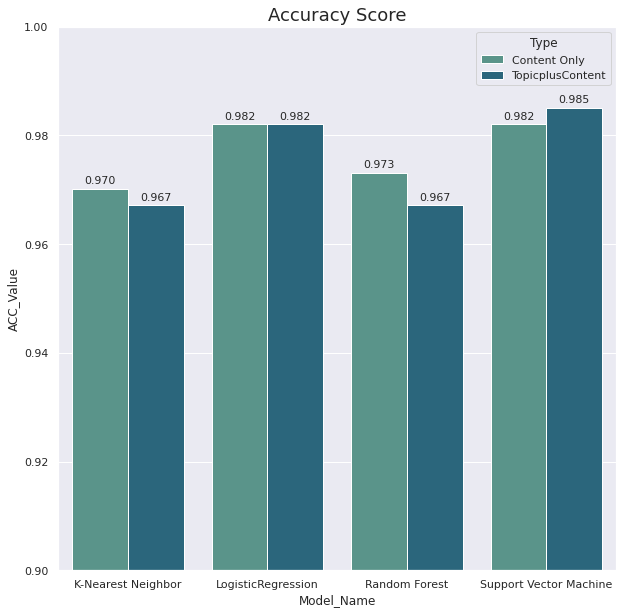

In [167]:
sns.set_theme(style='darkgrid')
#กำหนดขนาดของกราฟ
countplt, ax = plt.subplots(figsize = (10,10))
#สร้างกราฟ Bar chart 
c_value = sns.barplot(x ='Model_Name', y='ACC_Value', hue='Type', data = sum_viz ,palette='crest',ax=ax)
#แสดง Value ในกราฟแต่ละแท่ง
for p in c_value.patches:
    c_value.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 8), 
                   textcoords = 'offset points', size = 11)
plt.title('Accuracy Score', size = 18)
plt.ylim(0.9,1)

(0.9, 1.0)

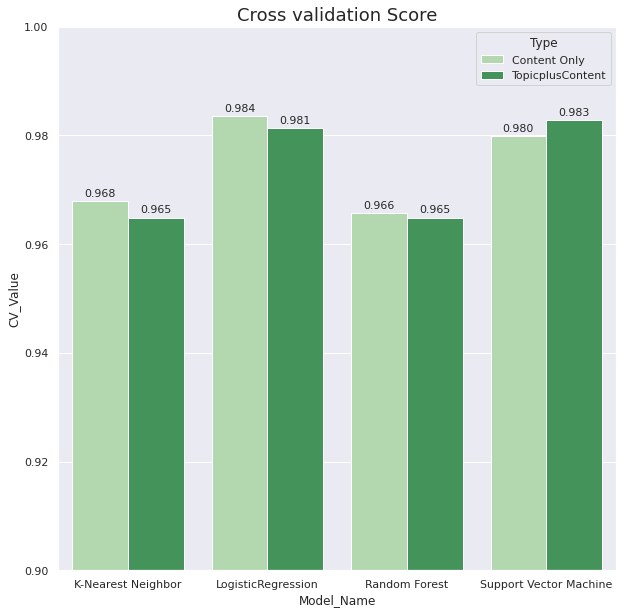

In [168]:
#กำหนดขนาดของกราฟ
countplt, ax = plt.subplots(figsize = (10,10))
#สร้างกราฟ Bar chart 
c_value = sns.barplot(x ='Model_Name', y='CV_Value', hue='Type', data = sum_viz ,palette='Greens',ax=ax)
#แสดง Value ในกราฟแต่ละแท่ง
for p in c_value.patches:
    c_value.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 8), 
                   textcoords = 'offset points', size = 11)
plt.title('Cross validation Score', size = 18)
plt.ylim(0.9,1)

(0.9, 1.0)

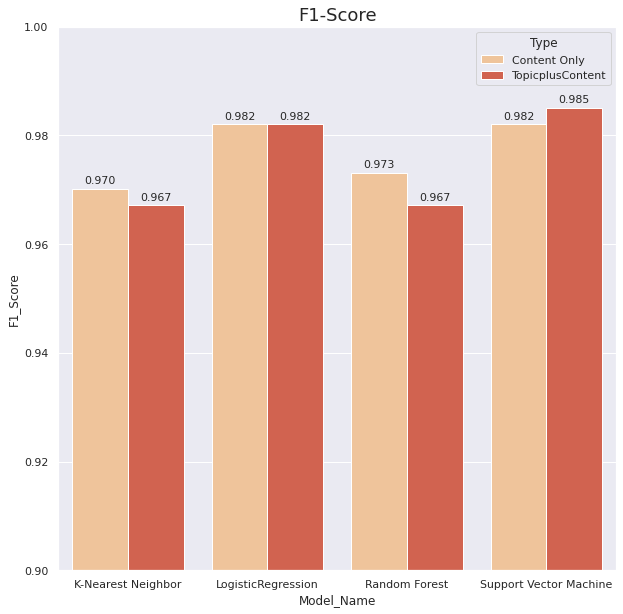

In [175]:
#กำหนดขนาดของกราฟ
countplt, ax = plt.subplots(figsize = (10,10))
#สร้างกราฟ Bar chart 
c_value = sns.barplot(x ='Model_Name', y='F1_Score', hue='Type', data = sum_viz ,palette='OrRd',ax=ax)
#แสดง Value ในกราฟแต่ละแท่ง
for p in c_value.patches:
    c_value.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 8), 
                   textcoords = 'offset points', size = 11)
plt.title('F1-Score', size = 18)
plt.ylim(0.9,1)